In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import re
import random
from scipy import sparse
from scipy.sparse import csr_matrix, vstack
from textblob import TextBlob
from langdetect import detect_langs
import pickle
from datetime import datetime

from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim.models import Word2Vec
import multiprocessing
import gensim
from gensim.utils import simple_preprocess

from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from langdetect import detect
# from wordcloud import WordCloud, STOPWORDS
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn import svm
import plotly.graph_objects as go
# from better_profanity import profanity
import string

import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import re
from gensim import utils
from gensim.models.doc2vec import LabeledSentence
from gensim.models import Doc2Vec
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [42]:
#how to load and run default random forest (poor performance as example) and tuned gradient boosting (good performance)

#import rock balanced data
X_train_balance = pd.read_pickle('./veclyrics_balanced_rock_doc2vec_train.pkl')
X_test_balance = pd.read_pickle('./veclyrics_balanced_rock_doc2vec_test.pkl')

y_train_balance = pd.read_pickle('./response_balanced_rock_doc2vec_train.pkl')
y_train_balance = np.array(y_train_balance.iloc[:,3:10])

y_test_balance = pd.read_pickle('./response_balanced_rock_doc2vec_test.pkl')
y_test_balance = np.array(y_test_balance.iloc[:,3:10])

#Importing model predictions of Random Forest and Gradient Boost
rf_pred_balance=pd.read_pickle('./rf_pred_balance.pkl')
gb_pred_balance=pd.read_pickle('./gb_pred_balance.pkl')

#Importing model predictions of probability for Random Forest and Gradient Boost
y_pred_prob_rf=pd.read_pickle('./y_pred_prob_rf.pkl')
y_pred_prob_gb=pd.read_pickle('./y_pred_prob_gb.pkl')


#Importing Ridge Classification model
rc = pickle.load(open('./RidgeBalanced.sav', 'rb'))

In [31]:
from sklearn import metrics
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import hamming_loss
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix


    
def ridge_eval_bi_metrics(ypred,ytrue):
        

    print (classification_report(ytrue, ypred))

    print ("The Matthews Correlation Coefficient is:", matthews_corrcoef(ytrue, ypred))
#     The MCC is in essence a correlation coefficient value between -1 and +1. 
#     A coefficient of +1 represents a perfect prediction, 0 an average random prediction and -1 an inverse prediction. 

    cnf_matrix = metrics.confusion_matrix(ytrue, ypred)
    
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    
    # create heatmap
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    
    
    
def eval_bi_metrics(y_pred_proba,ypred,ytrue):
        

    print (classification_report(ytrue, ypred))

    print ("The Matthews Correlation Coefficient is:", matthews_corrcoef(ytrue, ypred))
#     The MCC is in essence a correlation coefficient value between -1 and +1. 
#     A coefficient of +1 represents a perfect prediction, 0 an average random prediction and -1 an inverse prediction. 

    cnf_matrix = metrics.confusion_matrix(ytrue, ypred)
    
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    
    # create heatmap
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    
    fig, ax = plt.subplots()
    fpr, tpr, _ = metrics.roc_curve(ytrue,  y_pred_proba)
    auc = metrics.roc_auc_score(ytrue, y_pred_proba)
    plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
    plt.title("ROC Curve")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.legend(loc=4)
    plt.show()

In [60]:
y_pred_prob_rf[0][:, 0]

array([0.1, 0.5, 0.5, ..., 0.7, 0.3, 0.4])

### Random Forest

              precision    recall  f1-score   support

           0       0.54      0.59      0.56      3734
           1       0.55      0.49      0.52      3763

    accuracy                           0.54      7497
   macro avg       0.54      0.54      0.54      7497
weighted avg       0.54      0.54      0.54      7497

The Matthews Correlation Coefficient is: 0.08630311956489034


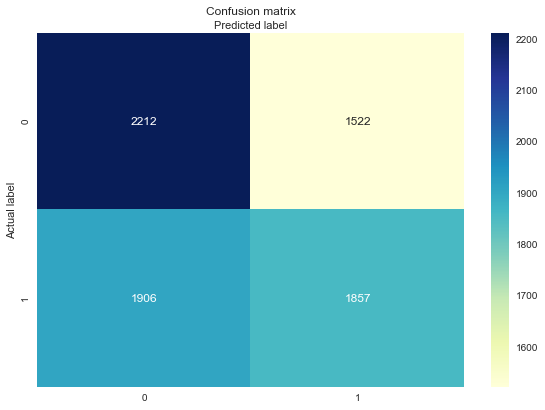

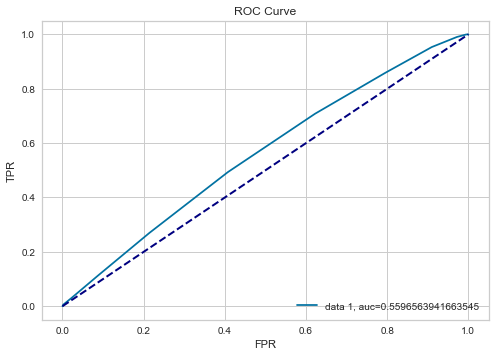

In [62]:
eval_bi_metrics(y_pred_prob_rf[0][:, 1],rf_pred_balance[:, 0],y_test_balance[:, 0])

In [63]:
accuracy_score(y_test_balance[:, 0],rf_pred_balance[:, 0])

0.542750433506736

### Gradient Boost

              precision    recall  f1-score   support

           0       0.58      0.54      0.56      3734
           1       0.58      0.61      0.59      3763

    accuracy                           0.58      7497
   macro avg       0.58      0.58      0.58      7497
weighted avg       0.58      0.58      0.58      7497

The Matthews Correlation Coefficient is: 0.15764316366665504


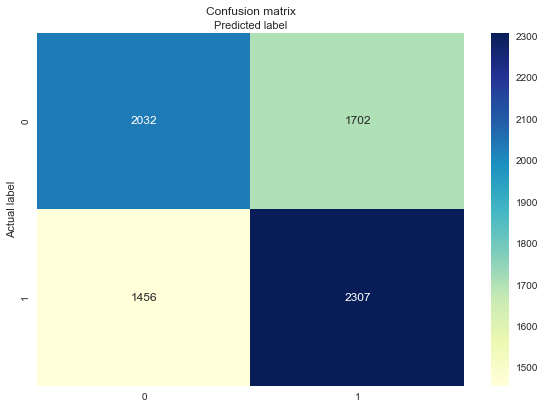

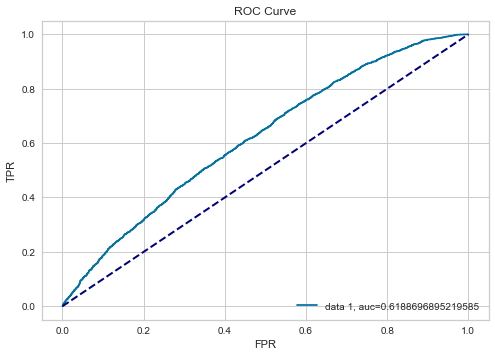

In [71]:
eval_bi_metrics(y_pred_prob_gb[:, 1],gb_pred_balance,y_test_balance[:, 0])

In [76]:
accuracy_score(y_test_balance[:, 0],gb_pred_balance)

0.578764839269041

### Ridge

In [65]:
test=rc.predict(X_test_balance)
test

array([1, 0, 1, ..., 0, 1, 1])

In [26]:
y_test_balance[:, 1]

7497

C:\Users\Roy's\AppData\Roaming\Python\Python36\site-packages\sklearn\base.py:197: FutureWarning:

From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.



0.5782312925170068

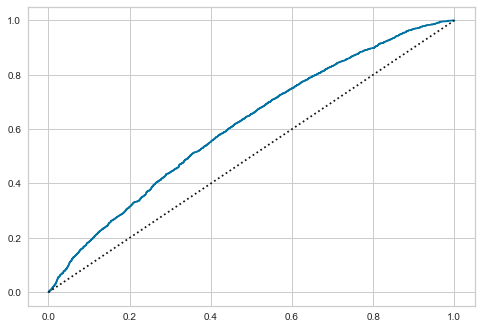

In [38]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(rc,micro=False, macro=False,per_class=False)
visualizer.fit(X_train_balance, y_train_balance[:, 0])
visualizer.score(X_test_balance, y_test_balance[:, 0]) 

In [34]:
metrics.roc_auc_score(y_test_balance[:, 0], test)

0.5781878311942986

              precision    recall  f1-score   support

           0       0.57      0.58      0.57      3662
           1       0.59      0.58      0.58      3835

    accuracy                           0.58      7497
   macro avg       0.58      0.58      0.58      7497
weighted avg       0.58      0.58      0.58      7497

The Matthews Correlation Coefficient is: 0.15641614356446323


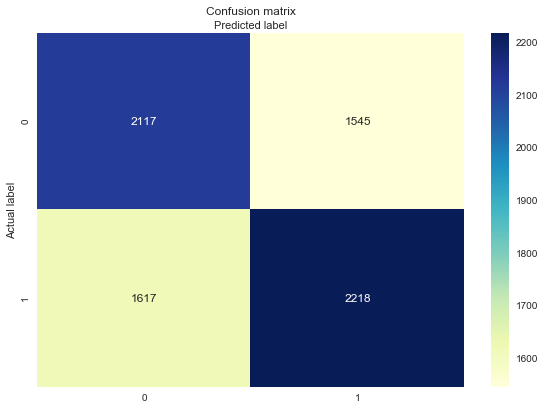

In [35]:
ridge_eval_bi_metrics(y_test_balance[:, 0],test)

In [77]:
accuracy_score(y_test_balance[:, 0],test)

0.5782312925170068